Importing The Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # for image recognition tasks
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets  import mnist
from tensorflow.math import confusion_matrix

Loading the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Working With Data

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
X_train[10].shape

(28, 28)

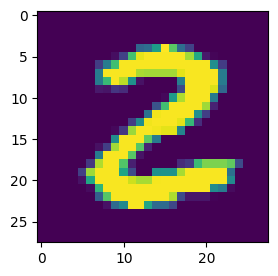

The label is : 2


In [7]:
plt.figure(figsize = (3, 3))
plt.imshow(X_train[25])
plt.show()

print(f"The label is : {y_train[25]}")

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

In [10]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [12]:
X_train_scaled[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Building The Nural Network

In [13]:
model = keras.Sequential([ 
            keras.layers.Flatten(input_shape = (28, 28)),
            keras.layers.Dense(50, activation = 'relu'),
            keras.layers.Dense(50, activation = 'relu'),
            keras.layers.Dense(10, activation = 'softmax')
])

C:\Users\HP\myworld\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
epoch_value = 10
model.fit(X_train_scaled, y_train, epochs=epoch_value)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9109 - loss: 0.3042
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9575 - loss: 0.1428
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9679 - loss: 0.1035
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9753 - loss: 0.0810
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9797 - loss: 0.0662
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9833 - loss: 0.0545
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9854 - loss: 0.0470
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9878 - loss: 0.0402
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9892 - loss: 0.0352
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9897 - loss: 0.0319


Getting Training & Test Data Accuracies

In [16]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9724 - loss: 0.1133
0.9724000096321106


In [17]:
X_test_scaled.shape

(10000, 28, 28)

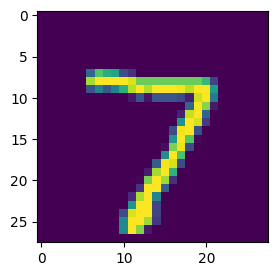

In [18]:
plt.figure(figsize = (3, 3))
plt.imshow(X_test_scaled[0])
plt.show()

Using Predict Function

In [19]:
y_pred = model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [20]:
y_pred.shape

(10000, 10)

In [21]:
print(y_pred[0])

[2.7403154e-11 2.2268856e-09 2.6130151e-09 1.8496338e-07 8.8984782e-18
 1.4359823e-09 1.9614839e-15 9.9999905e-01 1.6141664e-10 6.7362049e-07]


In [22]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [23]:
print(y_pred_labels[10])

0


In [24]:
print(y_test[10])

0


Using Confusion Matrix 

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 962    1    1    0    4    1    5    2    1    3]
 [   0 1122    2    2    1    0    3    1    4    0]
 [   3    0 1004    2    4    0    5   10    3    1]
 [   1    0    6  974    2    7    0    7    5    8]
 [   2    1    6    0  956    1    5    3    0    8]
 [   2    2    0    9    1  863    8    2    3    2]
 [   2    4    1    1    6    6  937    0    1    0]
 [   0    4    9    0    3    0    1 1003    1    7]
 [   6    1    5    4    8    4    3    8  929    6]
 [   0    2    0    1   22    5    1    3    1  974]], shape=(10, 10), dtype=int32)


Text(0.5, 58.7222222222222, 'Predicted Labels')

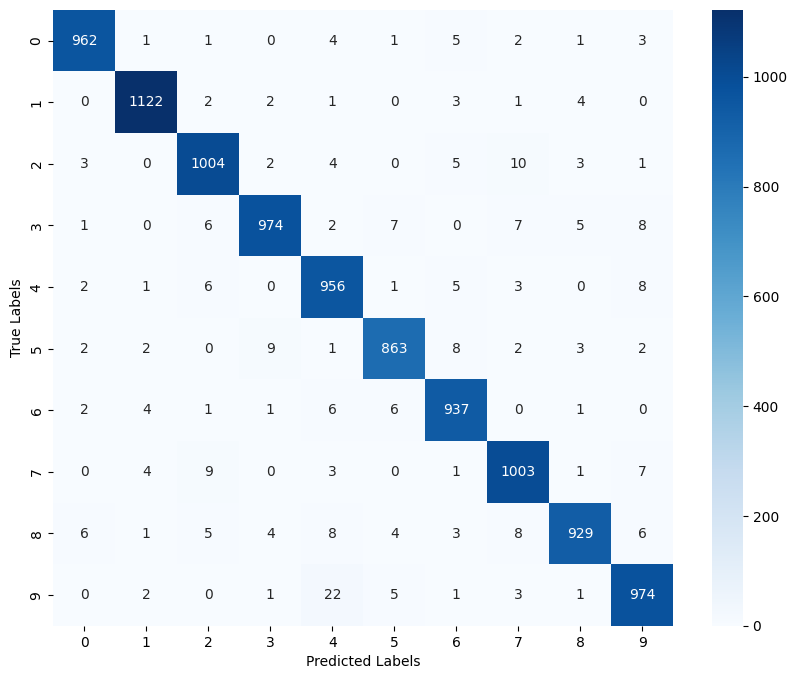

In [26]:
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot=True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building Predictive System

In [27]:
image_path = '../Test Image/MNIST_digit.PNG'
input_image = cv2.imread(image_path)

In [28]:
type(input_image)

numpy.ndarray

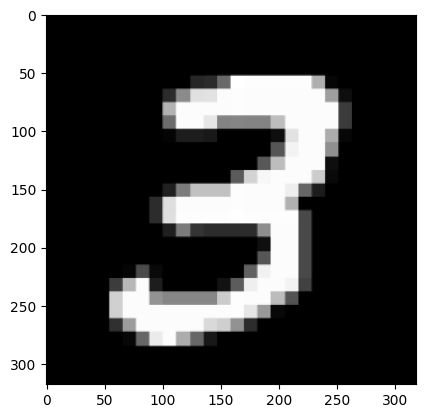

In [29]:
plt.imshow(input_image)

In [30]:
cv2.imshow('Input Image', input_image)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [31]:
input_image.shape

(318, 318, 3)

In [32]:
gray_scaled_input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [33]:
gray_scaled_input_image.shape

(318, 318)

In [34]:
input_image_resized = cv2.resize(gray_scaled_input_image, (28, 28))

In [35]:
input_image_resized.shape

(28, 28)

In [36]:
input_image_resized = input_image_resized / 255

In [37]:
image_reshaped = np.reshape(input_image_resized, [1, 28, 28])

In [39]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[1.4789593e-22 2.7582450e-16 2.9819736e-10 1.0000000e+00 9.6258892e-18
  3.9383562e-12 2.9436004e-27 4.2943381e-13 4.6855364e-13 8.8629842e-10]]


In [41]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3
